In [30]:
#Loaded the required libraries
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [8]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
#Loading the fashion_mnist data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.  #train data
x_test = x_test.astype('float32') / 255. #test data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #reshaping the train data
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) #reshaping the test data

In [10]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [11]:
#fitting the data to autoencoder model
history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6961 - val_loss: 0.6961
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6959 - val_loss: 0.6958
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6957 - val_loss: 0.6956
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6955 - val_loss: 0.6954
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - val_loss: 0.6949
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - val_loss: 0.6947
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6943

In [12]:
#predictions
Encoded_img = autoencoder.predict(x_test_noisy)

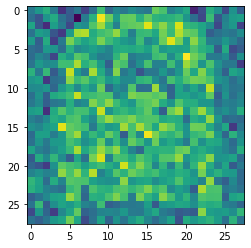

In [13]:
# Plotting x_test_noisy[i] image 
plt.imshow(x_test_noisy[1].reshape(28,28))
plt.show()

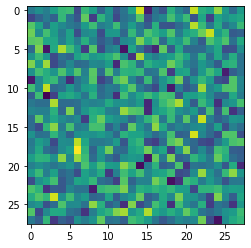

In [14]:
# Plotting Encoded image of x_test_noisy[i]
plt.imshow(Encoded_img[1].reshape(28,28))
plt.show()

## Changed the optimiser from adadelta to adam since by using adam we are able to Encode the image because adam is an extension of adadelta. ADAM perform both rescaling and smoothing the gradients based on the respective(first order or second order information)

In [15]:
# this is our input placeholder
input_img = Input(shape=(784,))
#adding extra hidden layer
hidden_layer = Dense(128, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_layer)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#added callback
clbk = keras.callbacks.TensorBoard(log_dir='./last1', histogram_freq=20,write_graph=True, write_images=True)
#fitting the data to autoencoder model
history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3953 - accuracy: 0.0079 - val_loss: 0.3132 - val_accuracy: 0.0067
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3204 - accuracy: 0.0127 - val_loss: 0.2956 - val_accuracy: 0.0071
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3122 - accuracy: 0.0115 - val_loss: 0.2868 - val_accuracy: 0.0080
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3078 - accuracy: 0.0120 - val_loss: 0.2802 - val_accuracy: 0.0085
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3045 - accuracy: 0.0134 - val_loss: 0.2743 - val_accuracy: 0.0080
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3019 - accuracy: 0.0134 - val_loss: 0.2702 - val_accuracy: 0.0096
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3000 - accuracy: 0.0138 - val_loss: 0.2670 - val_accuracy: 0.0094
Epoch 

In [17]:
#predictions
Encoded_img = autoencoder.predict(x_test_noisy)

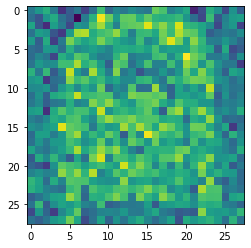

In [18]:
# Plotting x_test_noisy[i] image 
plt.imshow(x_test_noisy[1].reshape(28,28))
plt.show()

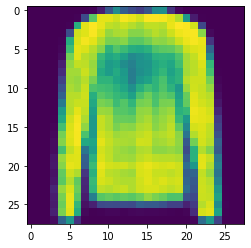

In [19]:
# Plotting Encoded image of x_test[i]
plt.imshow(Encoded_img[1].reshape(28,28))
plt.show()

Enter number of images to be displayed : 6


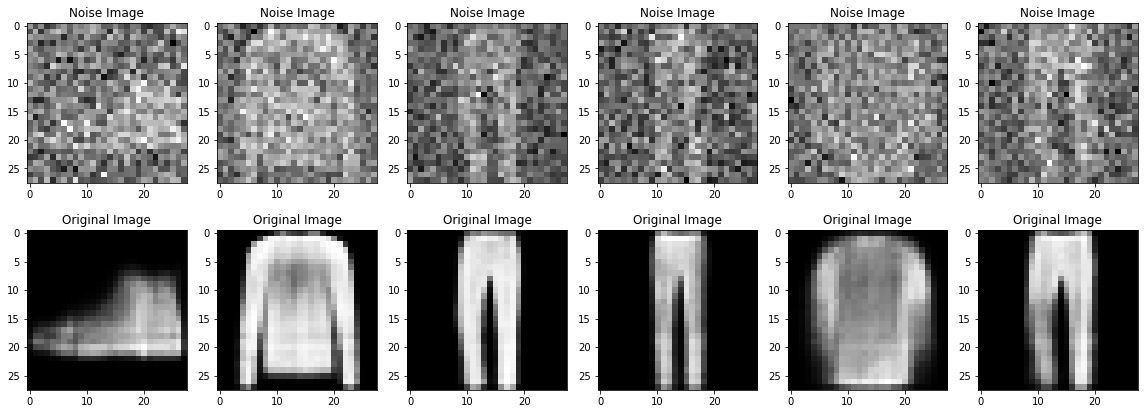

In [21]:
# Plotting some of the reconstructed images and their previous versions
num_of_images = int(input(('Enter number of images to be displayed : ' ))) #taking input form user

plot = plt.figure(figsize=(16, 6))

#looping through all the requested number of inages
for i in range(num_of_images):
    ax1 = plt.subplot(2, num_of_images, i+1) #plotting Noise images
    plt.imshow(x_test_noisy[i].reshape(28, 28)) #reshaping the image
    plt.title('Noise Image')
    plt.gray()

    ax2 = plt.subplot(2, num_of_images, i+1+num_of_images) # plotting original images
    plt.imshow(Encoded_img[i].reshape(28, 28)) #reshaping the image
    plt.title('Original Image')
    plt.tight_layout()
    plt.gray()

In [22]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

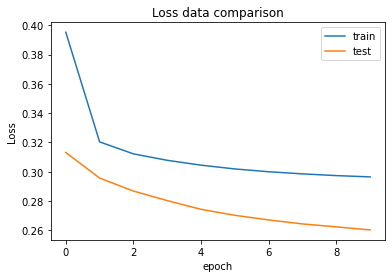

In [23]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

## Observations :
1. Loss of the train and test data is almost same and could see test data loss is very low and this is not looking good.

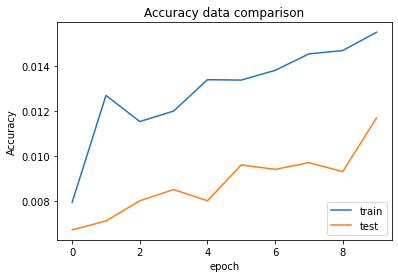

In [24]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

## Observations :
1. Accuracy of train data is more than the test data.